# Problem Statement

## Feature Engineering:

This section deals about feature importances for a given dataset. The given data set is german-credit data which helps classify whether a given person qualifies as a good credit or a bad credit. This helps the bank minimize and realize the risks involved in credit processing

### Import the dataset and describe it (german_credit.csv)

In [1]:
#import german_credit dataset and the necessary libraries
import pandas as pd
import numpy as np

gc_data = pd.read_csv("german_credit.csv")
gc_data.shape
gc_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [2]:
#Do a describe of the data and understand the description
gc_data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Check for the correlation of the columns.
Hint: Use corr()

In [3]:
gc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [4]:
gc_data.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


### Prepare the model data by converting non-numeric to dummy

#### Hint: Use get_dummies

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


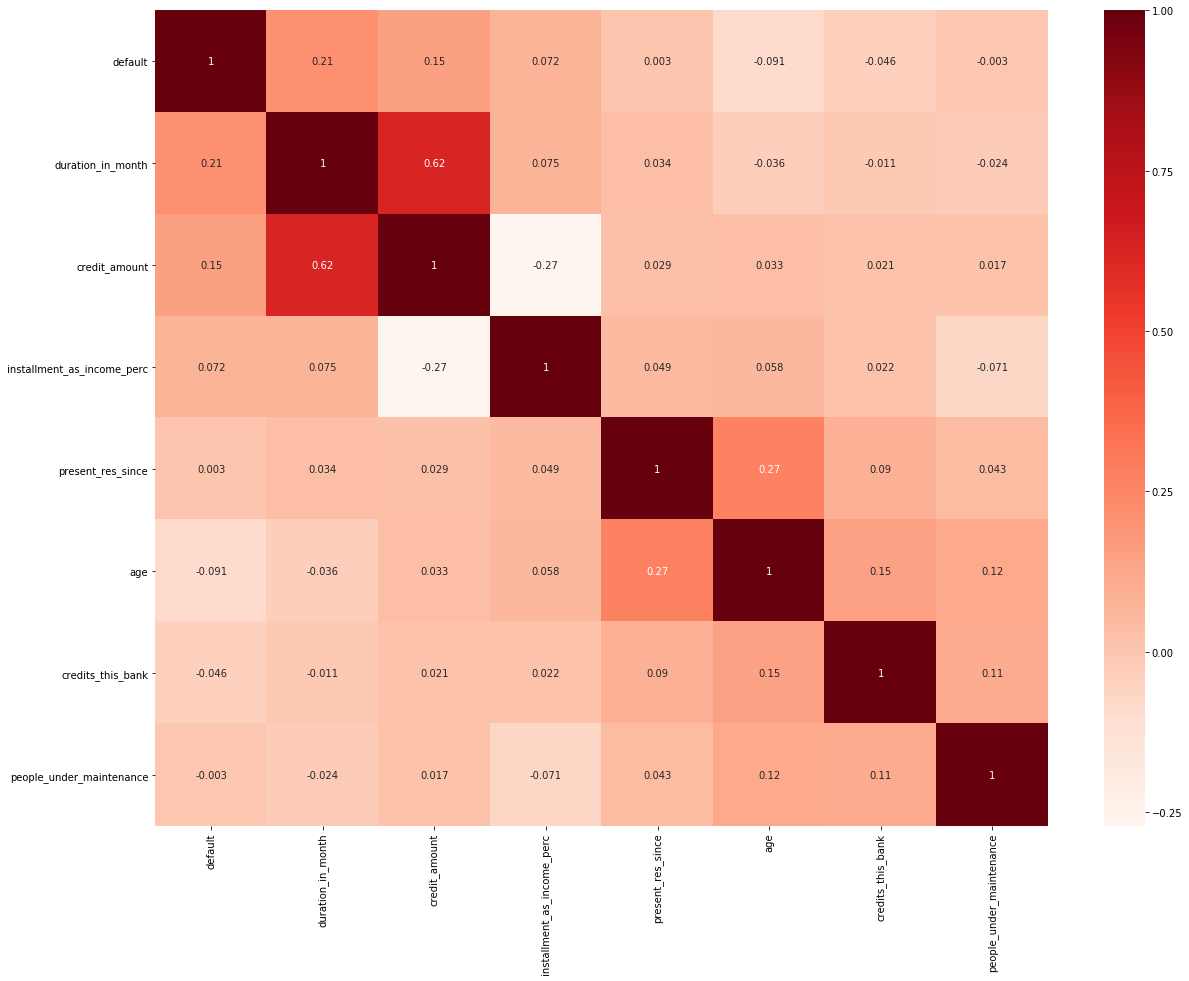

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(20,15))
sns.heatmap(gc_data.corr(), annot = True, cmap = plt.cm.Reds)

cat_col = gc_data.select_dtypes(exclude=np.number).columns
num_col = gc_data.select_dtypes(include=np.number).columns

#one-hot encoding
df_dummies = pd.get_dummies(gc_data[cat_col])
#concat all cat_col and num_col
data_procsd_df=pd.concat([gc_data[num_col],df_dummies],axis=1)
data_procsd_df.head()

### Drop the original variables which are converted to dummy

In [ ]:
print('It has been dropped already')

### Split Train/Test data 70:30 ratio
##### Hint:from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data_procsd_df.drop('default',axis =1),
                                                   data_procsd_df['default'], test_size = 0.30, random_state=40)

### Build Random Forest Model
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [7]:
#Create a RandomForest Classifier
rfcl = RandomForestClassifier(criterion='entropy',n_estimators = 500,max_depth=None,n_jobs=2,random_state=123)

#Train the Random forest model using the training sets
rfcl = rfcl.fit(X_train, y_train)


# prediction on test set
y_pred=rfcl.predict(X_test)


# Model Accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7466666666666667


### Calculate Confusion Matrix and Accuracy score
##### Hint: Use confusion_matrix and accuracy_score

In [8]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[193  25]
 [ 51  31]]


In [9]:
print("Accuracy score (training): {0:.3f}".format(rfcl.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(rfcl.score(X_test, y_test)))

Accuracy score (training): 1.000
Accuracy score (test): 0.747


### Show the list of the features importance

#### Print or display the list of features in descending orders of importance

In [10]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending = False))

                                                         Imp
credit_amount                                       0.098118
duration_in_month                                   0.080554
age                                                 0.080430
account_check_status_no checking account            0.047652
account_check_status_< 0 DM                         0.033758
present_res_since                                   0.033192
installment_as_income_perc                          0.032138
savings_... < 100 DM                                0.023962
other_installment_plans_none                        0.019661
credits_this_bank                                   0.019299
credit_history_critical account/ other credits ...  0.017700
account_check_status_0 <= ... < 200 DM              0.017127
personal_status_sex_female : divorced/separated...  0.016448
other_installment_plans_bank                        0.015929
job_skilled employee / official                     0.015656
present_emp_since_... < 

### K-fold cross-validation (Optional)
#### Check for k=10, 12, 15, 18, 20 and print the the cross validation score
#### Hint: use cross_val_score from model_selection

In [11]:
kfold_sel = [10, 12, 15, 18, 20]

from  sklearn.model_selection import KFold, cross_val_score

for ffoldval in kfold_sel:
    kfold = KFold(n_splits = ffoldval, random_state=123)
    results = cross_val_score(cv=kfold, X=X_train, y=y_train, estimator = rfcl)
    print(results)

[0.7        0.87142857 0.74285714 0.81428571 0.65714286 0.75714286
 0.8        0.74285714 0.75714286 0.77142857]
[0.69491525 0.81355932 0.88135593 0.76271186 0.77586207 0.60344828
 0.77586207 0.77586207 0.77586207 0.81034483 0.70689655 0.81034483]
[0.76595745 0.74468085 0.89361702 0.78723404 0.72340426 0.80851064
 0.59574468 0.74468085 0.76595745 0.78723404 0.69565217 0.80434783
 0.82608696 0.63043478 0.84782609]
[0.69230769 0.69230769 0.87179487 0.8974359  0.76923077 0.66666667
 0.82051282 0.66666667 0.66666667 0.69230769 0.76923077 0.87179487
 0.82051282 0.76923077 0.82051282 0.71794872 0.65789474 0.86842105]
[0.71428571 0.74285714 0.82857143 0.82857143 0.82857143 0.71428571
 0.77142857 0.85714286 0.62857143 0.68571429 0.65714286 0.82857143
 0.8        0.8        0.8        0.74285714 0.82857143 0.71428571
 0.68571429 0.82857143]


## Unsupervised Learning:
## KMeans Clustering

This section deals with clustering process. 

The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, 
Saab 9000 and an Opel Manta 400 cars. 
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Import the libraries and vehicle dataset

Check for NAs, missing values in the dataset

In [12]:
import pandas as pd
from scipy.stats import zscore
data_rd = pd.read_csv("vehicle.csv")
data_df= pd.DataFrame(data_rd)
data_df.head(3).T

,0,1,2
compactness,95,91,104
circularity,48,41,50
distance_circularity,83,84,106
radius_ratio,178,141,209
pr.axis_aspect_ratio,72,57,66
max.length_aspect_ratio,10,9,10
scatter_ratio,162,149,207
elongatedness,42,45,32
pr.axis_rectangularity,20,19,23
max.length_rectangularity,159,143,158


### Standardize the data

#### Hint: Use zscore from scipy.stats or StandardScaler

In [13]:
import numpy as np

#cat_col =data_df.drop('class', axis=1)
#cat_col = cat_col.select_dtypes(exclude=np.number).columns
#num_col = data_df.select_dtypes(include=np.number).columns

# one-hot encoding
#one_hot=pd.get_dummies(data_df[cat_col])
#one_hot.columns
#data_procsd_df=pd.concat([data_df[num_col],one_hot],axis=1)

#data_procsd_df.columns
#print(cat_col)
print(data_df.shape)
data_df.dropna(inplace=True)
data_df.shape

(846, 19)


(813, 19)

In [14]:
from scipy.stats import zscore
numeric_cols = data_df.drop('class', axis=1)
vehicle_class  = data_df.pop("class")

numeric_cols = numeric_cols.apply(zscore)

vehicle_std = numeric_cols.join(vehicle_class)

vehicle_std.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,van
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,van
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,car
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,van
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,bus


### Create a dummy array called distortion


In [15]:
vehicle_std_attributes= vehicle_std.drop("class", axis=1)

distortion =[]
meandistortions=[]
cluster_center_var=[]

### Calculating distortion - C distance
Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error.
#### Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.

In [16]:
clusters=range(1,10)
from sklearn.cluster import KMeans
from scipy.spatial import distance
for k in clusters:
    model = KMeans(n_clusters=k).fit(vehicle_std_attributes)
    distortion = (sum(np.min(distance.cdist(vehicle_std_attributes, model.cluster_centers_,'euclidean'), axis=1)))
    meandistortions.append(distortion/(vehicle_std_attributes.shape[0]))
    cluster_center_var.append(model.cluster_centers_)
    print(k)
    print(model.cluster_centers_)
    #print(distortion)
    #print(meandistortions)

1
[[-4.86149320e-17 -4.40265564e-16 -2.53453128e-16  3.26375526e-16
  -1.41201797e-16 -2.04701638e-16  3.34295937e-16 -2.70932654e-16
  -4.14046274e-16 -7.16114335e-16 -4.69762264e-17 -6.77331636e-17
   3.05618589e-16  1.16843121e-16  1.09247038e-18  1.46254472e-16
  -1.15030303e-15  3.13538999e-16]]
2
[[ 1.05786955  1.0942143   1.13708639  1.00301249  0.228961    0.30882445
   1.19967951 -1.14399738  1.20316373  1.01289926  1.15326048  1.20473969
   1.00470068 -0.07913426  0.14044464  0.24767096  0.0697104   0.23226373]
 [-0.56180643 -0.58110816 -0.60387639 -0.5326733  -0.12159511 -0.16400847
  -0.63711793  0.60754663 -0.63896831 -0.5379239  -0.61246602 -0.63980526
  -0.53356985  0.04202611 -0.07458642 -0.13153147 -0.03702134 -0.1233491 ]]
3
[[ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]
 [-0.91400071 -0.5132760

### Plotting Elbow/ Scree Plot
Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

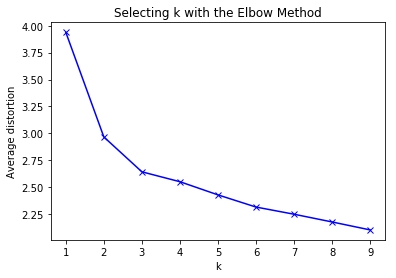

In [17]:
import matplotlib.pylab as plt
%matplotlib inline
#plt.plot(range(1,10), distortion)
plt.plot(clusters, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Find out the optimal value of K

In [18]:
# Let us first start with K = 2
final_model=KMeans(n_clusters=3, random_state=0)
final_model.fit(vehicle_std_attributes)
prediction=final_model.predict(vehicle_std_attributes)

### Using optimal value of K - Cluster the data.
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [19]:


#Append the prediction 
vehicle_std["GROUP"] = prediction
print("Groups Assigned : \n")
vehicle_std[["class", "GROUP"]]

Groups Assigned : 



,class,GROUP
0,van,2
1,van,2
2,car,0
3,van,2
4,bus,1
6,bus,2
7,van,2
8,van,2
10,van,2
11,car,2


You can use kmeans.cluster\_centers\_ function to pull the centroid information from the instance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017EE6B99208>,
      dtype=object)

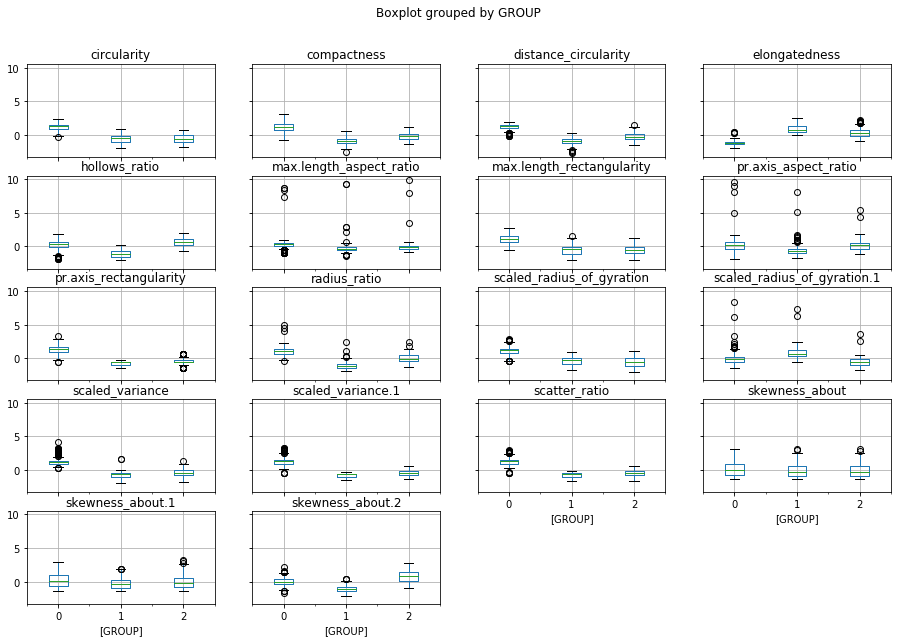

In [20]:
vehicle_std.boxplot(by = 'GROUP',  layout=(5,4), figsize=(15, 10))

### Store the centroids in a dataframe with column names from the original dataset given

Hint: Use pd.Dataframe function 

In [21]:
#print(final_model.cluster_centers_.shape)
#print(final_model.cluster_centers_)

#vehicle_std["centrod_val"] = final_model.cluster_centers_

centroid_val=final_model.cluster_centers_
print(final_model.cluster_centers_.shape)
print(centroid_val)

testdf = pd.DataFrame(centroid_val,columns=numeric_cols.columns)
#data_df.drop('class', axis=1)
numeric_cols.columns

(3, 18)
[[ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]
 [-0.91987072 -0.52009251 -0.89320752 -1.06435572 -0.50042171 -0.2190738
  -0.7791213   0.86589322 -0.74535635 -0.484632   -0.78240328 -0.78341064
  -0.38498232  0.83878747 -0.09524349 -0.30171562 -1.05420601 -1.11069466]
 [-0.2339617  -0.57387481 -0.30776905 -0.03041322  0.2050726  -0.11653151
  -0.45904181  0.32506329 -0.48798836 -0.53604446 -0.41380935 -0.46366305
  -0.60155031 -0.61924057 -0.06177969  0.01066762  0.81278556  0.69897299]]


Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

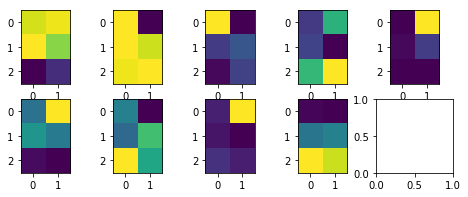

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = final_model.cluster_centers_.reshape(9, 3, 2)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center)

### Use kmeans.labels_ function to print out the labels of the classes

In [25]:
final_model.labels_
vehicle_std_attributes['labels'] =final_model.labels_ 

In [27]:

vehicle_std_attributes.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
labels,,,,,,,,,,,,,,,,,,
0,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
1,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
2,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313


In [29]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [30]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

#average is the distance calculation between clusters
Z = linkage(vehicle_std_attributes, 'average')
c, coph_dists = cophenet(Z , pdist(vehicle_std_attributes))

c
print('if cophenet score is close to 1, then it is a good model')


if cophenet score is close to 1, then it is a good model


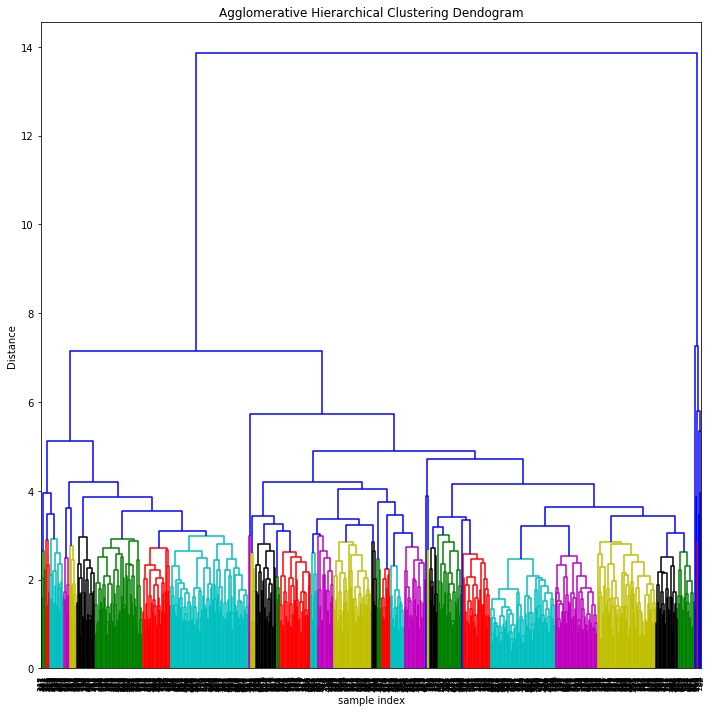

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 3, leaf_font_size=8. )
plt.tight_layout()

### Support Vector Machines:

#### SVM is optional and will not be graded

1. Import german_credit dataset and the necessary libraries.
2. Prepare the model data by converting non-numeric to dummy.
3. Drop the original variables which are converted to dummy.
4. Split Train/Test data 70:30 ratio.
5. Build SVM model.
6. Calculate Confusion Matrix and Accuracy score
    